┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃            Ex_02            ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  -Movimento quando Emec<2 > ┃
┃     - -1.43932              ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


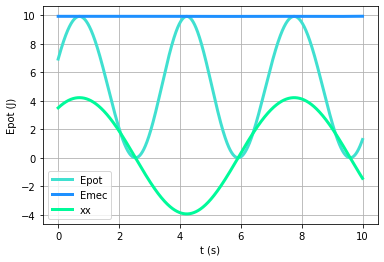

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Tempo inicial e final
ti = 0
tf = 10

# Massa
m = 1.5
k = 1.2
alpha = -0.01

# Posição inicial
xx0 = 3.5

# Aceleração inicial
ax0 = 0

# Velocidade inicial
vx0 = 2

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)


# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Epot = np.empty(n + 1)
Emec = np.empty(n + 1)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Preencher os vetores x, v, a
for i in range(n):    
    #           (mola | amortecimento | f0 externa) / m
    ax[i] = (-k * xx[i] - 3 * alpha * xx[i]**2 ) / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i + 1] * dt
    
    Epot[i] = 0.5 * k  * xx[i]**2 + alpha * xx[i]**3
    Emec[i] = 0.5 * m * vx[i]**2 + Epot[i]

Epot[-1] = 0.5 * k  * xx[-1]**2 + alpha * xx[-1]**3
Emec[-1] = 0.5 * m * vx[i]**2 + Epot[-1]

xxEpot = 0
for i in range(n):
    if (Epot[i]< 2):
        xxEpot = xx[i]

print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃            Ex_02            ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  -Movimento quando Emec<2 > ┃")
print("┃     - %-8s              ┃" % np.round(xxEpot, 5))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")

# Plot
plt.plot(t, Epot, label="Epot",  linestyle='-', linewidth=3, color="turquoise")
plt.plot(t, Emec , label="Emec",  linestyle='-', linewidth=3, color="dodgerblue")
plt.plot(t, xx, label="xx",  linestyle='-', linewidth=3, color="mediumspringgreen")
plt.xlabel("t (s)")
plt.ylabel("Epot (J)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
    
    